In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h2o
from h2o.estimators import H2ONaiveBayesEstimator

training_filename = 'Datasets/TrainingCorpus.csv'
testing_filename = 'Datasets/TestingCorpus.csv'

threshold = 0.5

tr_df = pd.read_csv(training_filename)
ts_df = pd.read_csv(testing_filename)

tr_df[["DELAYED"]] = tr_df[["DELAYED"]].astype(int).astype(bool) 
ts_df[["DELAYED"]] = ts_df[["DELAYED"]].astype(int).astype(bool) 

cols = list(tr_df.columns.values)

ytest = ts_df.values[:, len(cols) - 1]

print(ytest)

[False False True ..., False False False]

In [9]:
h2o.init()
h2o.connect()

training = h2o.H2OFrame(tr_df)
test = h2o.H2OFrame(ts_df)

target_column = cols[-1]
training_columns = cols[:-1]


model = H2ONaiveBayesEstimator(nfolds=3, laplace=1)
model.train(x=training_columns, y=target_column, training_frame=training, validation_frame=test)
probabilities = model.predict(test)

probs_array = []
pred_array = []

probabilities = probabilities.as_data_frame().values.tolist()
for i in range(len(probabilities)):
    if probabilities[i][0] >= threshold:
        pred_array.append(1.0)
    else:
        pred_array.append(0.0)
    probs_array.append(probabilities[i][0])

Checking whether there is an H2O instance running at http://localhost:54321

.

 connected.

H2O cluster uptime:,5 hours 47 mins
H2O cluster version:,3.10.4.8
H2O cluster version age:,3 months and 25 days !!!
H2O cluster name:,H2O_from_python_Alonso_0qj9wo
H2O cluster total nodes:,1
H2O cluster free memory:,541 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


Connecting to H2O server at http://localhost:54321..

.

 successful.

H2O cluster uptime:,5 hours 47 mins
H2O cluster version:,3.10.4.8
H2O cluster version age:,3 months and 25 days !!!
H2O cluster name:,H2O_from_python_Alonso_0qj9wo
H2O cluster total nodes:,1
H2O cluster free memory:,541 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


Parse progress: |

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

██

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

████████████████████████| 100%

Parse progress: |

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

██████████████████████████████████████| 100%

naivebayes Model Build progress: |

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

| 100%

naivebayes prediction progress: |

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

███████████████████| 100%

In [11]:
tp, fp, tn, fn = 0, 0, 0, 0
for x in range(len(ytest)):
    if ytest[x] == pred_array[x] == 1:
        tp += 1
for x in range(len(ytest)):
    if pred_array[x] == 1 and ytest[x] != pred_array[x]:
        fp += 1
for x in range(len(ytest)):
    if ytest[x] == pred_array[x] == 0:
        tn += 1
for x in range(len(ytest)):
    if pred_array[x] == 0 and ytest[x] != pred_array[x]:
        fn += 1

sensitivity = tp / (tp + fn)  # the fraction of positives that are correctly classified
specificity = tn / (tn + fp)  # the fraction of negatives that are correctly classified
precision = tp / (tp + fp)
error_rate = (fp + fn) / (fp + fn + tp + tn)
accuracy = 1.0 - error_rate
f_score = (2 * precision * sensitivity) / (precision + sensitivity)
print("TP: {0}, FP: {1}, TN: {2}, FN: {3}".format(tp, fp, tn, fn))
print("Sensitivity or Recall: {0}%".format(sensitivity * 100.00))
print("Specificity: {0}%".format(specificity * 100.00))
print("Precision: {0}%".format(precision * 100.00))
print("Error rate: {0}%".format(error_rate * 100.00))
print("Accuracy: {0}%".format(accuracy * 100.00))
print("F1 Score: {0}%".format(f_score))

TP: 58908, FP: 60336, TN: 324699, FN: 46387

Sensitivity or Recall: 55.945676432879054%

Specificity: 84.32973625774281%

Precision: 49.40122773472879%

Error rate: 21.76554565292762%

Accuracy: 78.23445434707239%

F1 Score: 0.5247017221952535%

False

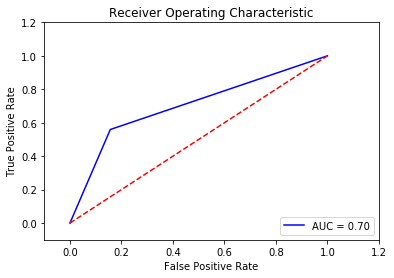

In [14]:
from sklearn.metrics import roc_curve, auc

print(probs_array[0])

false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, probs_array)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
         label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()